<a href="https://colab.research.google.com/github/khadijabendib/Argumentation/blob/main/Complete_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# n=int(input("Bonjour,Veuillez donner le nombre des arguments:"))
# Arguments=[]
# for i in range(n):
#   x=input("Donne moi le nom de {} : ".format(i+1))
#   Arguments.append(x)

In [ ]:
# list2=[]
# for i in (Arguments):
#   for j in (Arguments):
#     if i!=j:
#       m=input("Est ce que {} ".format(i)+"  attaque {} ".format(j))
#       while m!="oui" and m!="non":
#         m=input("Est ce que {} ".format(i)+"  attaque {} (répondez par oui ou non ): ".format(j))
#       if m=="oui":
#         # if check_cycle(list2,(i,j))==True:
#         #   print("Il y aura un cycle donc cette relation ne sera pas prise en compte")
#         # else:
#          list2.append((i,j))

In [ ]:
# retourner un cycle de des autres cycles
def get_cycle_by_element(el,cycle):
  for c in cycle:
    if el in c:
      return c
  return []

In [ ]:
def search_no_attaquant(list1,cycle):
  argument_accepte=[]
  for i in range(len(list1)-1):
    x=0
    for j in range(len(list1)):
     if j!=i: 
      if list1[i][0]==list1[j][1]:
        x=1
    if x==0:
      c=get_cycle_by_element(list1[i][0],cycle)
      taille=len(c)
      if taille==0:
        argument_accepte.append(list1[i][0])
        
      else:
        print("il se trouve dans le cycle")
  return argument_accepte

In [ ]:
def find_cycles(dico):
    """
    Trouve tous les cycles dans un dictionnaire.

    Args:
    dico: un dictionnaire où les clés sont les éléments attaquants et les valeurs sont les éléments attaqués.

    Returns:
    Une liste de cycles, où chaque cycle est une liste d'éléments.
    """
    cycles = []
    visited = set()
    for node in dico:
        if node not in visited:
            stack = [(node, [])]
            while stack:
                curr, path = stack.pop()
                if curr in visited:
                    continue
                visited.add(curr)
                path.append(curr)
                for neighbor in dico.get(curr, []):
                    index = path.index(neighbor) if neighbor in path else -1
                    if index >= 0:
                        cycle = path[index:]
                        if cycle not in cycles:
                            cycles.append(cycle)
                    else:
                        stack.append((neighbor, path[:]))
    return cycles


In [ ]:
def localisation(list2):
    """
    Vérifie si la liste donnée commence par un cycle.

    Args:
    list2: une liste de tuples de deux éléments représentant les relations à vérifier.

    Returns:
    True si la liste commence par un cycle, False sinon.
    """
    dico = {}
    for relation in list2:
        attaquant = relation[0]
        attaque = relation[1]
        if attaquant in dico:
            dico[attaquant].append(attaque)
        else:
            dico[attaquant] = [attaque]

    visited = set()
    for node in dico:
        if node not in visited:
            stack = [(node, [])]
            while stack:
                curr, path = stack.pop()
                if curr in visited:
                    # Si on rencontre un noeud visité précédemment, on a détecté un cycle
                    if curr == node:
                        return True
                    continue
                visited.add(curr)
                path.append(curr)
                for neighbor in dico.get(curr, []):
                    stack.append((neighbor, path[:]))
    return False


In [ ]:
def list_to_dic(list2):
    """
    Convertit une liste de relations en un dictionnaire.

    Args:
    list2: une liste de tuples de deux éléments représentant les relations à convertir.

    Returns:
    Un dictionnaire où les clés sont les éléments attaquants et les valeurs sont les éléments attaqués.
    """
    dico={}
    for relation in list2:
        attaquant = relation[0]
        attaque = relation[1]
        if attaquant in dico:
            dico[attaquant].append(attaque)
        else:
            dico[attaquant] = [attaque]
    return dico

In [ ]:
def Complete1(list2,Arguments):
  argument_accepte=[]
  argument_no_accept=[]
  dictionnaire=list_to_dic(list2)
  cycle=find_cycles(dictionnaire)
  argument_accepte=search_no_attaquant(list2,cycle)
  if localisation(list2)==True:
    taille1=len(get_cycle_by_element(list2[0][0],cycle))
    if taille1 %2==0:
       argument_accepte.append(list2[0][0])
       argument_no_accept.append(list2[0][1])
  for l in range(100):
            
      for argument in argument_accepte:
        for i in range(len(list2)):
          if argument==list2[i][0]:
            taille=len(get_cycle_by_element(list2[i][1],cycle))
            if taille==0:
              if list2[i][1] not in argument_no_accept:
                argument_no_accept.append(list2[i][1])
            else:
                if list2[i-1][1] in argument_accepte:
                    if list2[i][1] not in argument_accepte and list2[i][1] not in argument_no_accept:
                       argument_no_accept.append(list2[i][1])

      for argument in argument_no_accept:
        for i in range(len(list2)):
          if list2[i][0]==argument:
              if len(get_cycle_by_element(list2[i][1],cycle))==0:
                  if list2[i][1] not in argument_accepte and list2[i][1] not in argument_no_accept:
                      argument_accepte.append(list2[i][1])
              else:
                  if len(get_cycle_by_element(list2[i][0],cycle)) >0:
                      if list2[i][1] not in argument_accepte and list2[i][1] not in argument_no_accept:
                       argument_accepte.append(list2[i][1])


      for i in range(len(list2)):
        x=0
        for j in range(len(list2)):
          if j!=i:
            if list2[i][0]==list2[j][1]:
                 x=1
        if x==0:
          if list2[i][0] not in argument_accepte:
             argument_accepte.append(list2[i][0])
          else:
            for argument in argument_accepte:
               for i in range(len(list2)):
                  if argument==list2[i][0]:
                     taille=len(get_cycle_by_element(argument,cycle))
                     if taille==0:
                      if list2[i][1] not in argument_no_accept and list2[i][1] not in argument_accepte:
                       argument_no_accept.append(list2[i][1])
                     else:
                            if list2[i-1][1] in argument_accepte:
                                if list2[i][1] not in argument_no_accept and list2[i][1] not in argument_accepte:
                                 argument_no_accept.append(list2[i][1])
  for argument in argument_accepte:
               for i in range(len(list2)):
                  if argument==list2[i][0]:
                      if list2[i][1] not in argument_no_accept and list2[i][1] not in argument_accepte:
                       argument_no_accept.append(list2[i][1])

  return argument_accepte,argument_no_accept

In [ ]:
def Complete2(list2,Arguments):
  argument_accepte=[]
  argument_no_accept=[]
  dictionnaire=list_to_dic(list2)
  cycle=find_cycles(dictionnaire)
  argument_accepte=search_no_attaquant(list2,cycle)
  if localisation(list2)==True:
    taille1=len(get_cycle_by_element(list2[0][0],cycle))
    if taille1 %2==0:
       argument_accepte.append(list2[0][1])
       argument_no_accept.append(list2[0][0])
  for l in range(100): 
      for argument in argument_accepte:
        for i in range(len(list2)):
          if argument==list2[i][0]:
            taille=len(get_cycle_by_element(list2[i][1],cycle))
            if taille==0:
              if list2[i][1] not in argument_no_accept:
                argument_no_accept.append(list2[i][1])
            else:
                if list2[i-1][1] in argument_accepte:
                    if list2[i][1] not in argument_accepte and list2[i][1] not in argument_no_accept:
                       argument_no_accept.append(list2[i][1])

      for argument in argument_no_accept:
        for i in range(len(list2)):
          if list2[i][0]==argument:
              if len(get_cycle_by_element(list2[i][1],cycle))==0:
                  if list2[i][1] not in argument_accepte and list2[i][1] not in argument_no_accept:
                      argument_accepte.append(list2[i][1])
              else:
                  if len(get_cycle_by_element(list2[i][0],cycle)) >0:
                      if list2[i][1] not in argument_accepte and list2[i][1] not in argument_no_accept:
                       argument_accepte.append(list2[i][1])


      for i in range(len(list2)):
        x=0
        for j in range(len(list2)):
          if j!=i:
            if list2[i][0]==list2[j][1]:
                 x=1
        if x==0:
          if list2[i][0] not in argument_accepte:
             argument_accepte.append(list2[i][0])
          else:
            for argument in argument_accepte:
               for i in range(len(list2)):
                  if argument==list2[i][0]:
                     taille=len(get_cycle_by_element(argument,cycle))
                     if taille==0:
                      if list2[i][1] not in argument_no_accept and list2[i][1] not in argument_accepte:
                       argument_no_accept.append(list2[i][1])
                     else:
                            if list2[i-1][1] in argument_accepte:
                                if list2[i][1] not in argument_no_accept and list2[i][1] not in argument_accepte:
                                 argument_no_accept.append(list2[i][1])
  for argument in argument_accepte:
               for i in range(len(list2)):
                  if argument==list2[i][0]:
                      if list2[i][1] not in argument_no_accept and list2[i][1] not in argument_accepte:
                       argument_no_accept.append(list2[i][1])

  return argument_accepte,argument_no_accept

In [ ]:
list2=[('a', 'b'),('b','c'),('c','d'),('d','e'),('e','r'),('r','d')]
Arguments=['a','b','c','d','e','r']

In [ ]:
list2=[('a', 'b'),('b','a'),('b','c'),('c','l'),('l','d'),('d','e'),('e','r'),('r','d')]
Arguments=['a','b','c','d','e','r']
Argument_accepte=[]
Argument_no_accept=[]
r,m=Complete1(list2,Arguments)
Argument_accepte.append(r)
Argument_no_accept.append(m)
r,m=Complete2(list2,Arguments)
Argument_accepte.append(r)
Argument_no_accept.append(m)
Argument_accepte.append([])
Argument_no_accept.append([])
print(Argument_accepte)

[['a', 'c'], ['b', 'l', 'e'], []]


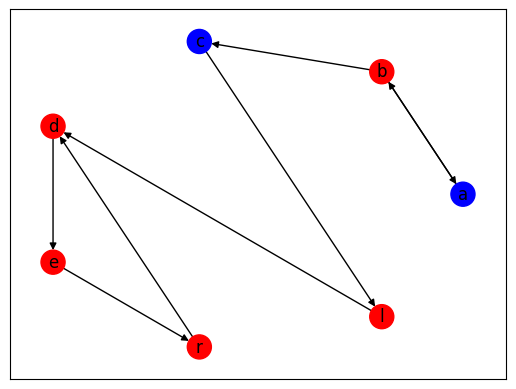

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter les noeuds correspondant aux lettres
for lettre in Arguments:
    G.add_node(lettre)

# Ajouter les arêtes entre les noeuds
for i in range(len(list2)):
  G.add_edge(list2[i][0],list2[i][1])


# Dessiner le graphe
pos = nx.circular_layout(G)  # Positionner les noeuds en cercle
node_colors = ['blue' if n in Argument_accepte[0] else 'red' if n in Argument_no_accept[0] else 'red' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos=pos, arrows=True)
plt.show()

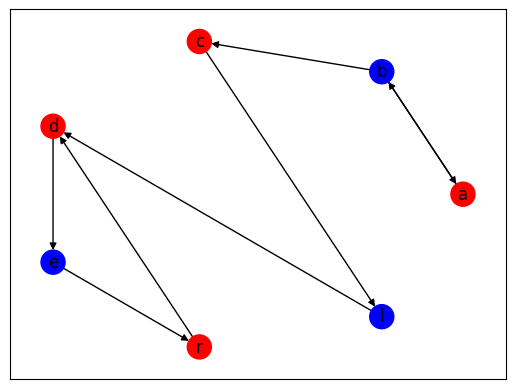

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter les noeuds correspondant aux lettres
for lettre in Arguments:
    G.add_node(lettre)

# Ajouter les arêtes entre les noeuds
for i in range(len(list2)):
  G.add_edge(list2[i][0],list2[i][1])


# Dessiner le graphe
pos = nx.circular_layout(G)  # Positionner les noeuds en cercle
node_colors = ['blue' if n in Argument_accepte[1] else 'red' if n in Argument_no_accept[1] else 'red' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos=pos, arrows=True)
plt.show()

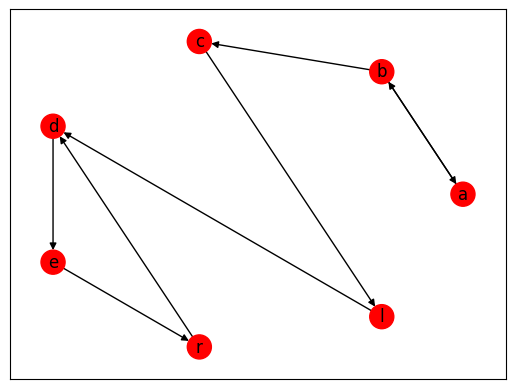

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter les noeuds correspondant aux lettres
for lettre in Arguments:
    G.add_node(lettre)

# Ajouter les arêtes entre les noeuds
for i in range(len(list2)):
  G.add_edge(list2[i][0],list2[i][1])


# Dessiner le graphe
pos = nx.circular_layout(G)  # Positionner les noeuds en cercle
node_colors = ['blue' if n in Argument_accepte[2] else 'red' if n in Argument_no_accept[2] else 'red' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos=pos, arrows=True)
plt.show()